# Linear Regression Project: Predicting Medical Aid Charges

## Project Overview 

##  Objective
This project aims to build a **Linear Regression model** to predict the **medical aid charges** of clients based on their lifestyle, demographic, and health-related information. The work forms Part 1 of a machine learning portfolio and uses a real-world dataset sourced from Kaggle.

## What is Linear regression 
Geeks for Geeks(2020)Linear regression is a form of supervised machine-learning technique that learns from labelled datasets and maps data points to the most optimised linear functions that may be used to forecast new datasets.  It finds the linear relationship between the dependent variable and one or more independent factors by fitting a linear equation to the observed data.  It predicts the continuous output variables using the independent input variable.

## Exploratory Data Analysis (EDA) - Plan 
Geeks for Geeks(2020) Exploratory Data Analysis (EDA) is a crucial first stage in data science projects.  It entails looking at and visualising data to understand its primary aspects, identifying patterns, and determining how different elements of the data are related.

 ## Dataset Description
- **Dataset Name**: Insurance.csv
- **Source**: [Kaggle Insurance Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)
- **Rows**: 1,338
- **Features**:
  - `age`: Age of the primary beneficiary
  - `sex`: Gender
  - `bmi`: Body Mass Index
  - `children`: Number of dependents
  - `smoker`: Smoking status
  - `region`: Residential area in the US
  - `charges`: Annual medical charges billed (Target variable)

## Process overview 

### Data Preparation
- No missing values.
- Encoded categorical features using One-Hot Encoding.
- Checked distributions and correlations.

### Model Training
- Split data: 80% train / 20% test.
- Trained using `LinearRegression()` from scikit-learn.

### Evaluation
- Metrics used:
  - **Mean Squared Error (MSE)**
  - **Mean Absolute Error (MAE)**
  - **R² Score**
- Model performed well (R² ≈ 0.79).

---

## Key Insights
- **Smoking status** is the most influential factor.
- **BMI** and **age** also significantly impact charges.
- Gender and region have minimal effect.

## Report plan 

This report presents the development of a linear regression model to predict medical insurance charges using personal and lifestyle factors. It covers all steps from data cleaning and exploratory data analysis (EDA) to model training, evaluation, and interpretation, with a focus on transparency and feature enhancement.
### Report Structure 
1. Project Overview
Brief explanation of the objective: predicting insurance charges using linear regression.

Summary of the dataset and project scope.

2. Data Cleaning
Handling missing values (if any).

Correcting inconsistent data entries.

Explanation of why data preparation is essential.

3. Exploratory Data Analysis (EDA)
Visualizations (boxplots, pairplots, histograms).

Identification of trends (e.g., smoker status and high charges).

Heatmap to visualize feature correlations.

4. Feature Engineering
Creation of custom features:

age_group to categorize age.

bmi_category for BMI segmentation.

smoker_bmi_interaction to highlight the compounding effect of smoking and BMI.

Justification for each custom feature.

5. Data Encoding & Splitting
One-hot encoding of categorical variables.

Splitting data into training and test sets.

Explanation of how and why it’s done.

6. Model Training
Use of LinearRegression from Scikit-learn.

Fitting the model with training data.

7. Model Evaluation
Evaluation metrics: MSE, MAE, R² Score.

Interpretation of each metric.

Actual vs. Predicted scatter plot.

8. Results and Interpretation
Summary of insights.

Feature impact on charges.

Visual findings integrated with model outputs.

9. Conclusion
What was achieved.

Importance of EDA and feature engineering.

Key takeaways.

10. Analysis Plan
Overview of how each phase supports the overall objective.

Steps taken to ensure valid, transparent, and interpretable results.

11. References
Proper citation of tools, libraries, datasets, and online resources





## Code analysis 

Importing of libraries

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Importing the dataset 

In [4]:
df = pd.read_csv('insurance.csv')

Looking at the first few rows of the dataset 

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Custom feature 1
### Justification for age grouping 
Definition: Categorize age into groups like 'young' (18–35), 'middle-aged' (36–55), 'senior' (56+)

Why? Medical costs tend to increase exponentially with age, not linearly. Grouping age helps the model learn this non-linear relationship better.

In [6]:
def group_age(age):
    if age <= 35:
        return 'young'
    elif age <= 55:
        return 'middle_aged'
    else:
        return 'senior' #(Stack Overflow, 2019 )

# Now apply the function to create the new column
df['age_group'] = df['age'].apply(group_age)

Method used to check if feature has been implemented properly 

In [7]:
print(df.columns)  # Should show 'age_group' as one of the columns
print(df[['age', 'age_group']].head())  # See if age_group matches correctly
print(df['age_group'].value_counts())  # How many in each category

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group'],
      dtype='object')
   age age_group
0   19     young
1   18     young
2   28     young
3   33     young
4   32     young
age_group
young          574
middle_aged    548
senior         216
Name: count, dtype: int64


## Custom Feature 2 
### Weight categorisation
Definition: Categorize BMI into 'underweight', 'normal', 'overweight', 'obese'

Why? Medical costs often jump significantly when a person moves from one BMI category to another. This feature introduces non-linear trends that the regression model may otherwise miss.

In [8]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese' #(Stack Overflow, 2019 )

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

Line of code to check if feature was implemented 

In [9]:
print(df['bmi_category'].unique())

['overweight' 'obese' 'normal' 'underweight']


## Custom Feature 3 
### Justification for smoke BMI interaction 
Definition: Multiply smoker status (binary) by bmi

Why? Smokers with a high BMI are likely to incur disproportionately higher medical costs. This feature introduces an interaction term that models such relationships.

In [10]:
# Encode 'smoker' to binary first
df['smoker_encoded'] = df['smoker'].map({'yes': 1, 'no': 0}) #(Stack Overflow, 2018)


df['smoker_bmi_interaction'] = df['smoker_encoded'] * df['bmi']

Checking of correaltion 

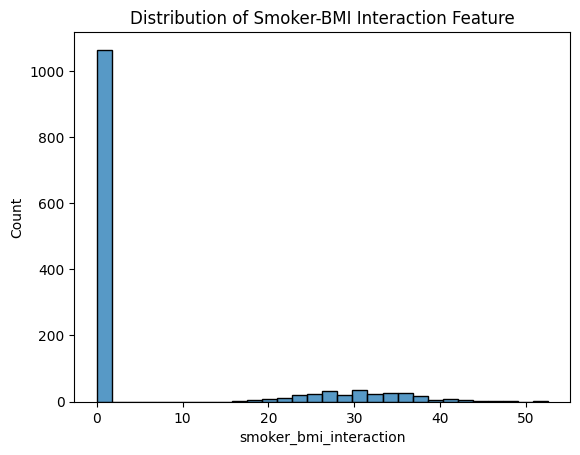

In [11]:
sns.histplot(df['smoker_bmi_interaction'], bins=30)
plt.title('Distribution of Smoker-BMI Interaction Feature')
plt.show()

Checking dataset structure and summary statistics 

In [12]:
df.info
df.describe 

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

        age_group bmi_category  smoker_encoded  smoker_bmi_interaction  
0           young   overweight               1      

Checking for any missing values

In [13]:
df.isnull().sum()

age                       0
sex                       0
bmi                       0
children                  0
smoker                    0
region                    0
charges                   0
age_group                 0
bmi_category              0
smoker_encoded            0
smoker_bmi_interaction    0
dtype: int64

In [14]:
df.dtypes

age                         int64
sex                        object
bmi                       float64
children                    int64
smoker                     object
region                     object
charges                   float64
age_group                  object
bmi_category               object
smoker_encoded              int64
smoker_bmi_interaction    float64
dtype: object

Distribution of the target variable 

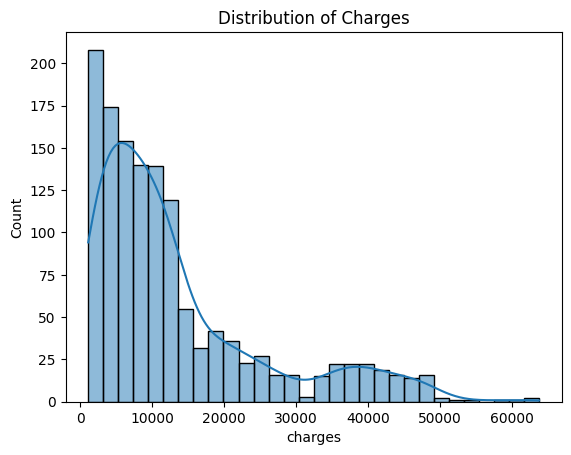

In [15]:

sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

Boxplots of charges against categorical variables

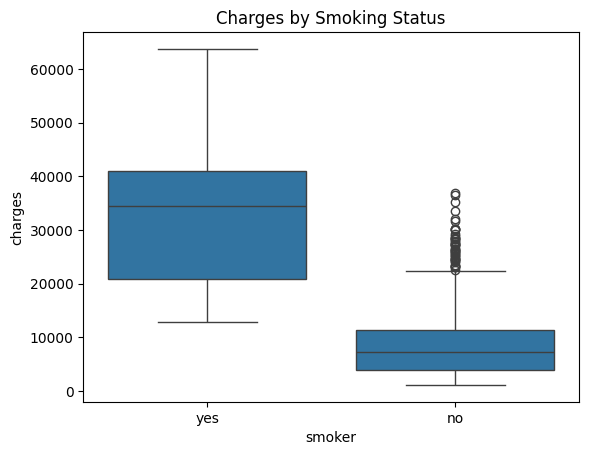

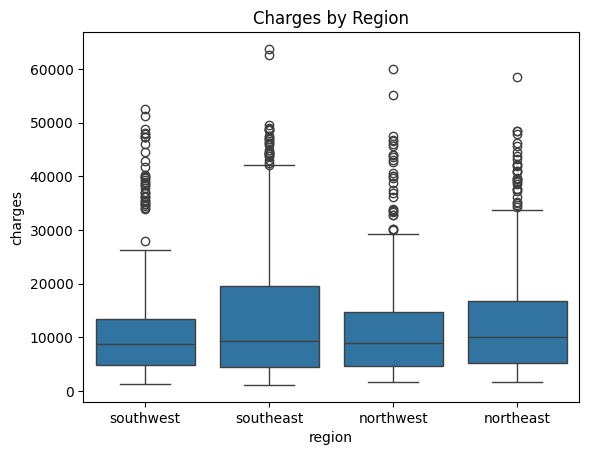

In [16]:

sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.show()
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")
plt.show()

## Pairplot 
The pairplot is a grid of scatterplots and histograms that shows the relationships between each pair of features in the dataset. 

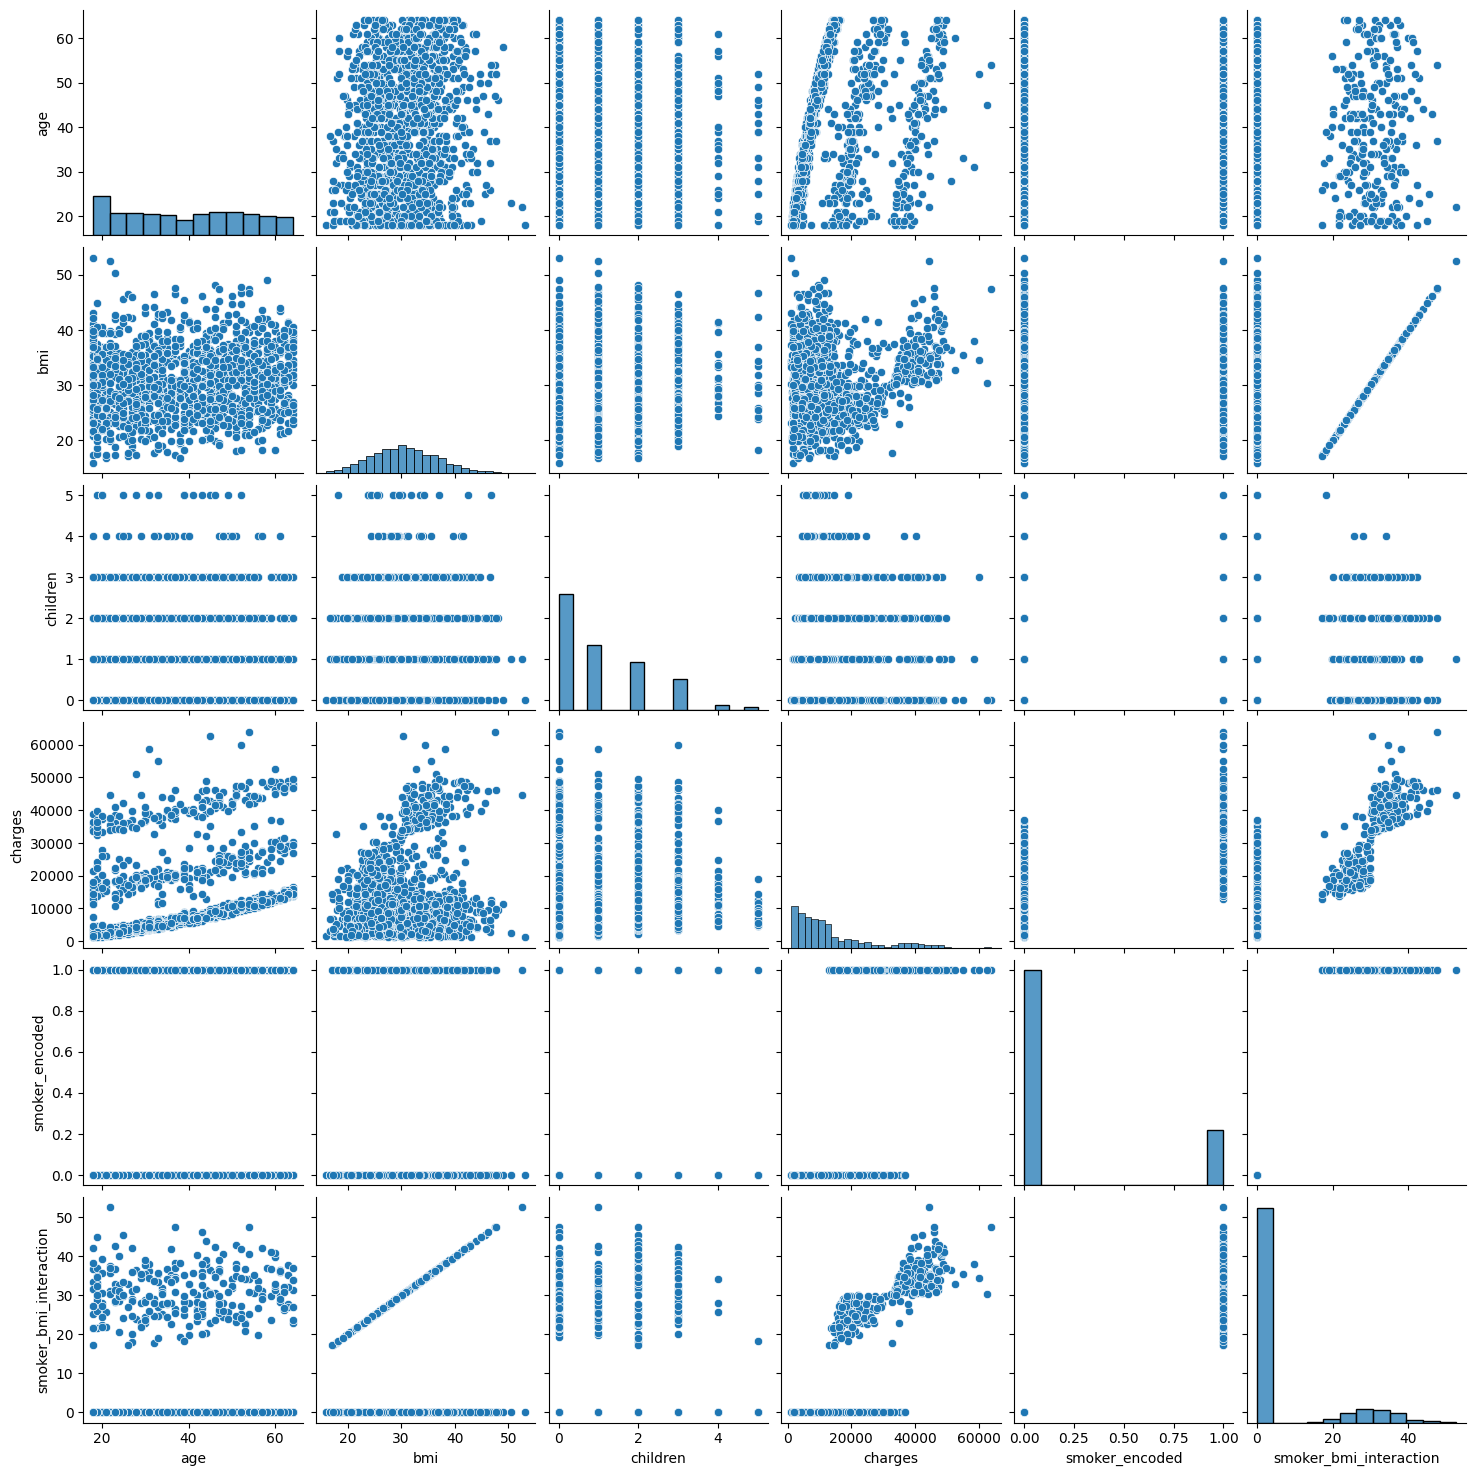

In [17]:
# Pairplot
sns.pairplot(df)
plt.show()

Feature Engineering 

Convert categorical features

In [18]:

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,bmi,children,charges,smoker_encoded,smoker_bmi_interaction,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_senior,age_group_young,bmi_category_obese,bmi_category_overweight,bmi_category_underweight
0,19,27.900,0,16884.92400,1,27.9,False,True,False,False,True,False,True,False,True,False
1,18,33.770,1,1725.55230,0,0.0,True,False,False,True,False,False,True,True,False,False
2,28,33.000,3,4449.46200,0,0.0,True,False,False,True,False,False,True,True,False,False
3,33,22.705,0,21984.47061,0,0.0,True,False,True,False,False,False,True,False,False,False
4,32,28.880,0,3866.85520,0,0.0,True,False,True,False,False,False,True,False,True,False


## Heatmap 
A heatmap was used to visualize correlations between features.

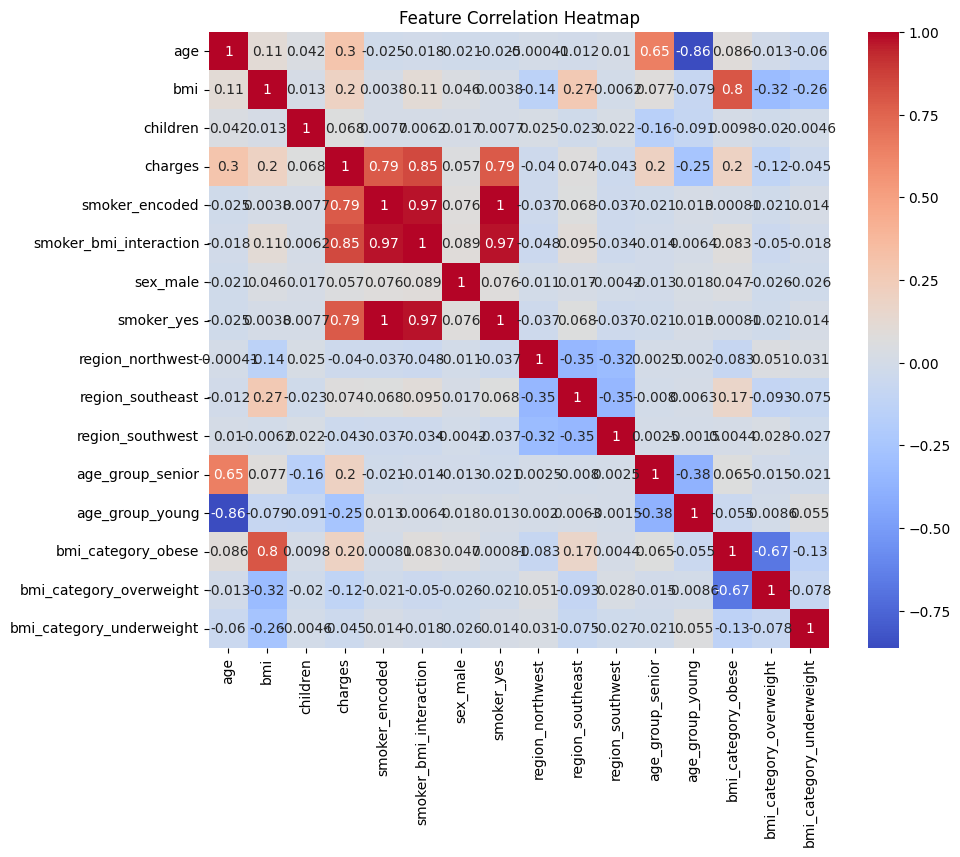

In [19]:

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show() #(GeeksforGeeks, 2025)



## Model Training 
This is done to evaluate how well the model generalises to unseen data, we need to separate the dataset into: 
•	Training data: Used to train the model (80%)
•	Testing data: Used to test the models performance on new data (20%)


In [20]:
#  6. Model Training
# Define features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #(Scikit-learn, 2025)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train) #(Scikit-learn, 2025)

# Model Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Intercept
print("Intercept:", model.intercept_)


                           Coefficient
age                         305.409295
bmi                        -217.900288
children                    503.863632
smoker_encoded           -10731.482740
smoker_bmi_interaction     1478.929368
sex_male                   -536.508819
smoker_yes               -10731.482740
region_northwest           -710.773992
region_southeast           -812.774678
region_southwest          -1244.514039
age_group_senior            260.247441
age_group_young            1533.652887
bmi_category_obese         3369.859236
bmi_category_overweight     -30.272179
bmi_category_underweight   -878.898453
Intercept: 1102.8787908450813


## Model Evaluation 
### Evaluation metrics being used
mean squared error(mse)

mean absolute error(mae)

R-squared

In [21]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)



Mean Squared Error (MSE): 20747740.86049782
Mean Absolute Error (MAE): 2736.326317208691
R-squared (R²): 0.8663580651440155


## What is it?  

This scatter plot is used to visualize the performance of the linear regression model by comparing the actual medical insurance charges (y_test) against the model's predicted charges (y_pred).

### Why This Was Used:

It provides a quick and intuitive way to assess model performance.

It complements numerical metrics (MSE, MAE, R²) with a visual perspective.

Helps stakeholders (like clients) understand how closely the predictions match real-world outcomes.

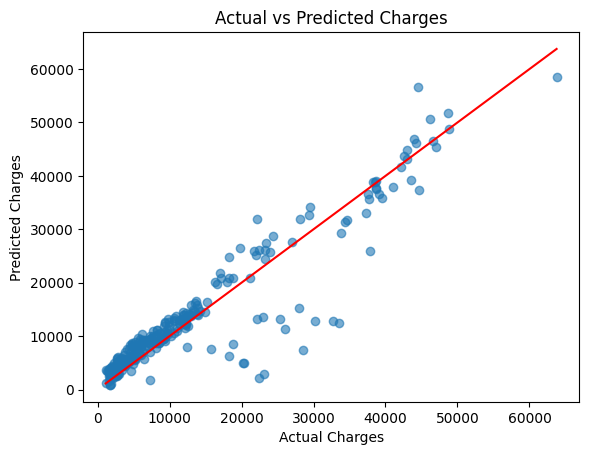

In [22]:
# Visualize Predictions vs Actual
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # ideal line
plt.show()

## Reference list 
Stack Overflow (2019) If else statements Python. Stack Overflow. Available at: https://stackoverflow.com/questions/53966543/if-else-statements-python (Accessed: 25 April 2025).

Stack Overflow (2018) Categorical data (yes/no) to 0/1 Python - is it a right approach? Stack Overflow. Available at: https://stackoverflow.com/questions/49227490/categorical-data-yes-no-to-0-1-python-is-it-a-right-approach (Accessed: 25 April 2025).

Scikit-learn (2025) sklearn.model_selection.train_test_split. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html (Accessed: 25 April 2025).

GeeksforGeeks (2020) ML | Linear Regression. GeeksforGeeks. Available at: https://www.geeksforgeeks.org/ml-linear-regression/ (Accessed: 25 April 2025).

GeeksforGeeks (2025) Seaborn heatmap – A Comprehensive Guide. GeeksforGeeks. Available at: https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/ (Accessed: 25 April 2025).